<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%963%22_%D0%9B%D1%83%D1%87%D1%88%D0%B0%D1%8F_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%A1%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B8_val_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C_60_95_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install aiuniver==1.2.4

In [21]:
from aiuniver import датасет
from aiuniver import модель

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Загрузите датасет стройки

In [23]:
(x_train, y_train), (x_test, y_test) = датасет.загрузить_базу_СТРОЙКА()

Загрузка данных
Это может занять несколько минут...
Загрузка данных (Готово)


2. Посмотрите на примеры изображений

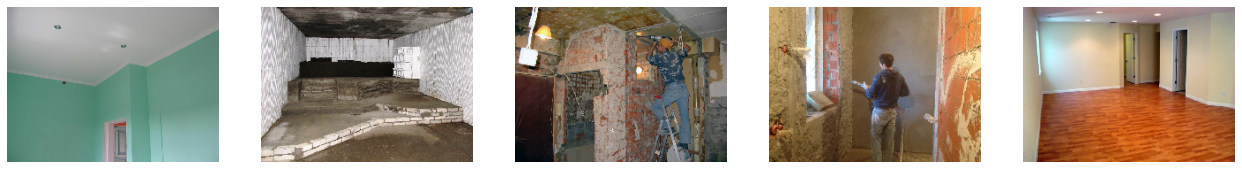

In [24]:
датасет.показать_примеры(
    изображения = x_train/255)

3. Подберите архитектуру нейронной сети (линейная, PSP, UNET), которая будет давать минимум 60% точности (Обратите внимание, что количество классов в данном датасете равно 7). Поэтому казывайте этот параметр при создании своей сети.

In [65]:
# Ваше решение
модель_PSP = модель.создать_PSP(
    количество_фильтров = 26,
    входной_размер = x_train.shape[1:],
    количество_блоков = 4,
    количество_выходных_классов = 7
)

Создана модель нейронной сети!


4. Тестирование модели

Структура модели:
_________________________________________________________________
Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 176, 240, 3) 0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 176, 240, 26) 728         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 176, 240, 26) 104         conv2d_76[0][0]                  
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 176, 240, 26) 0           batch_normalization_34[0][0]     
__

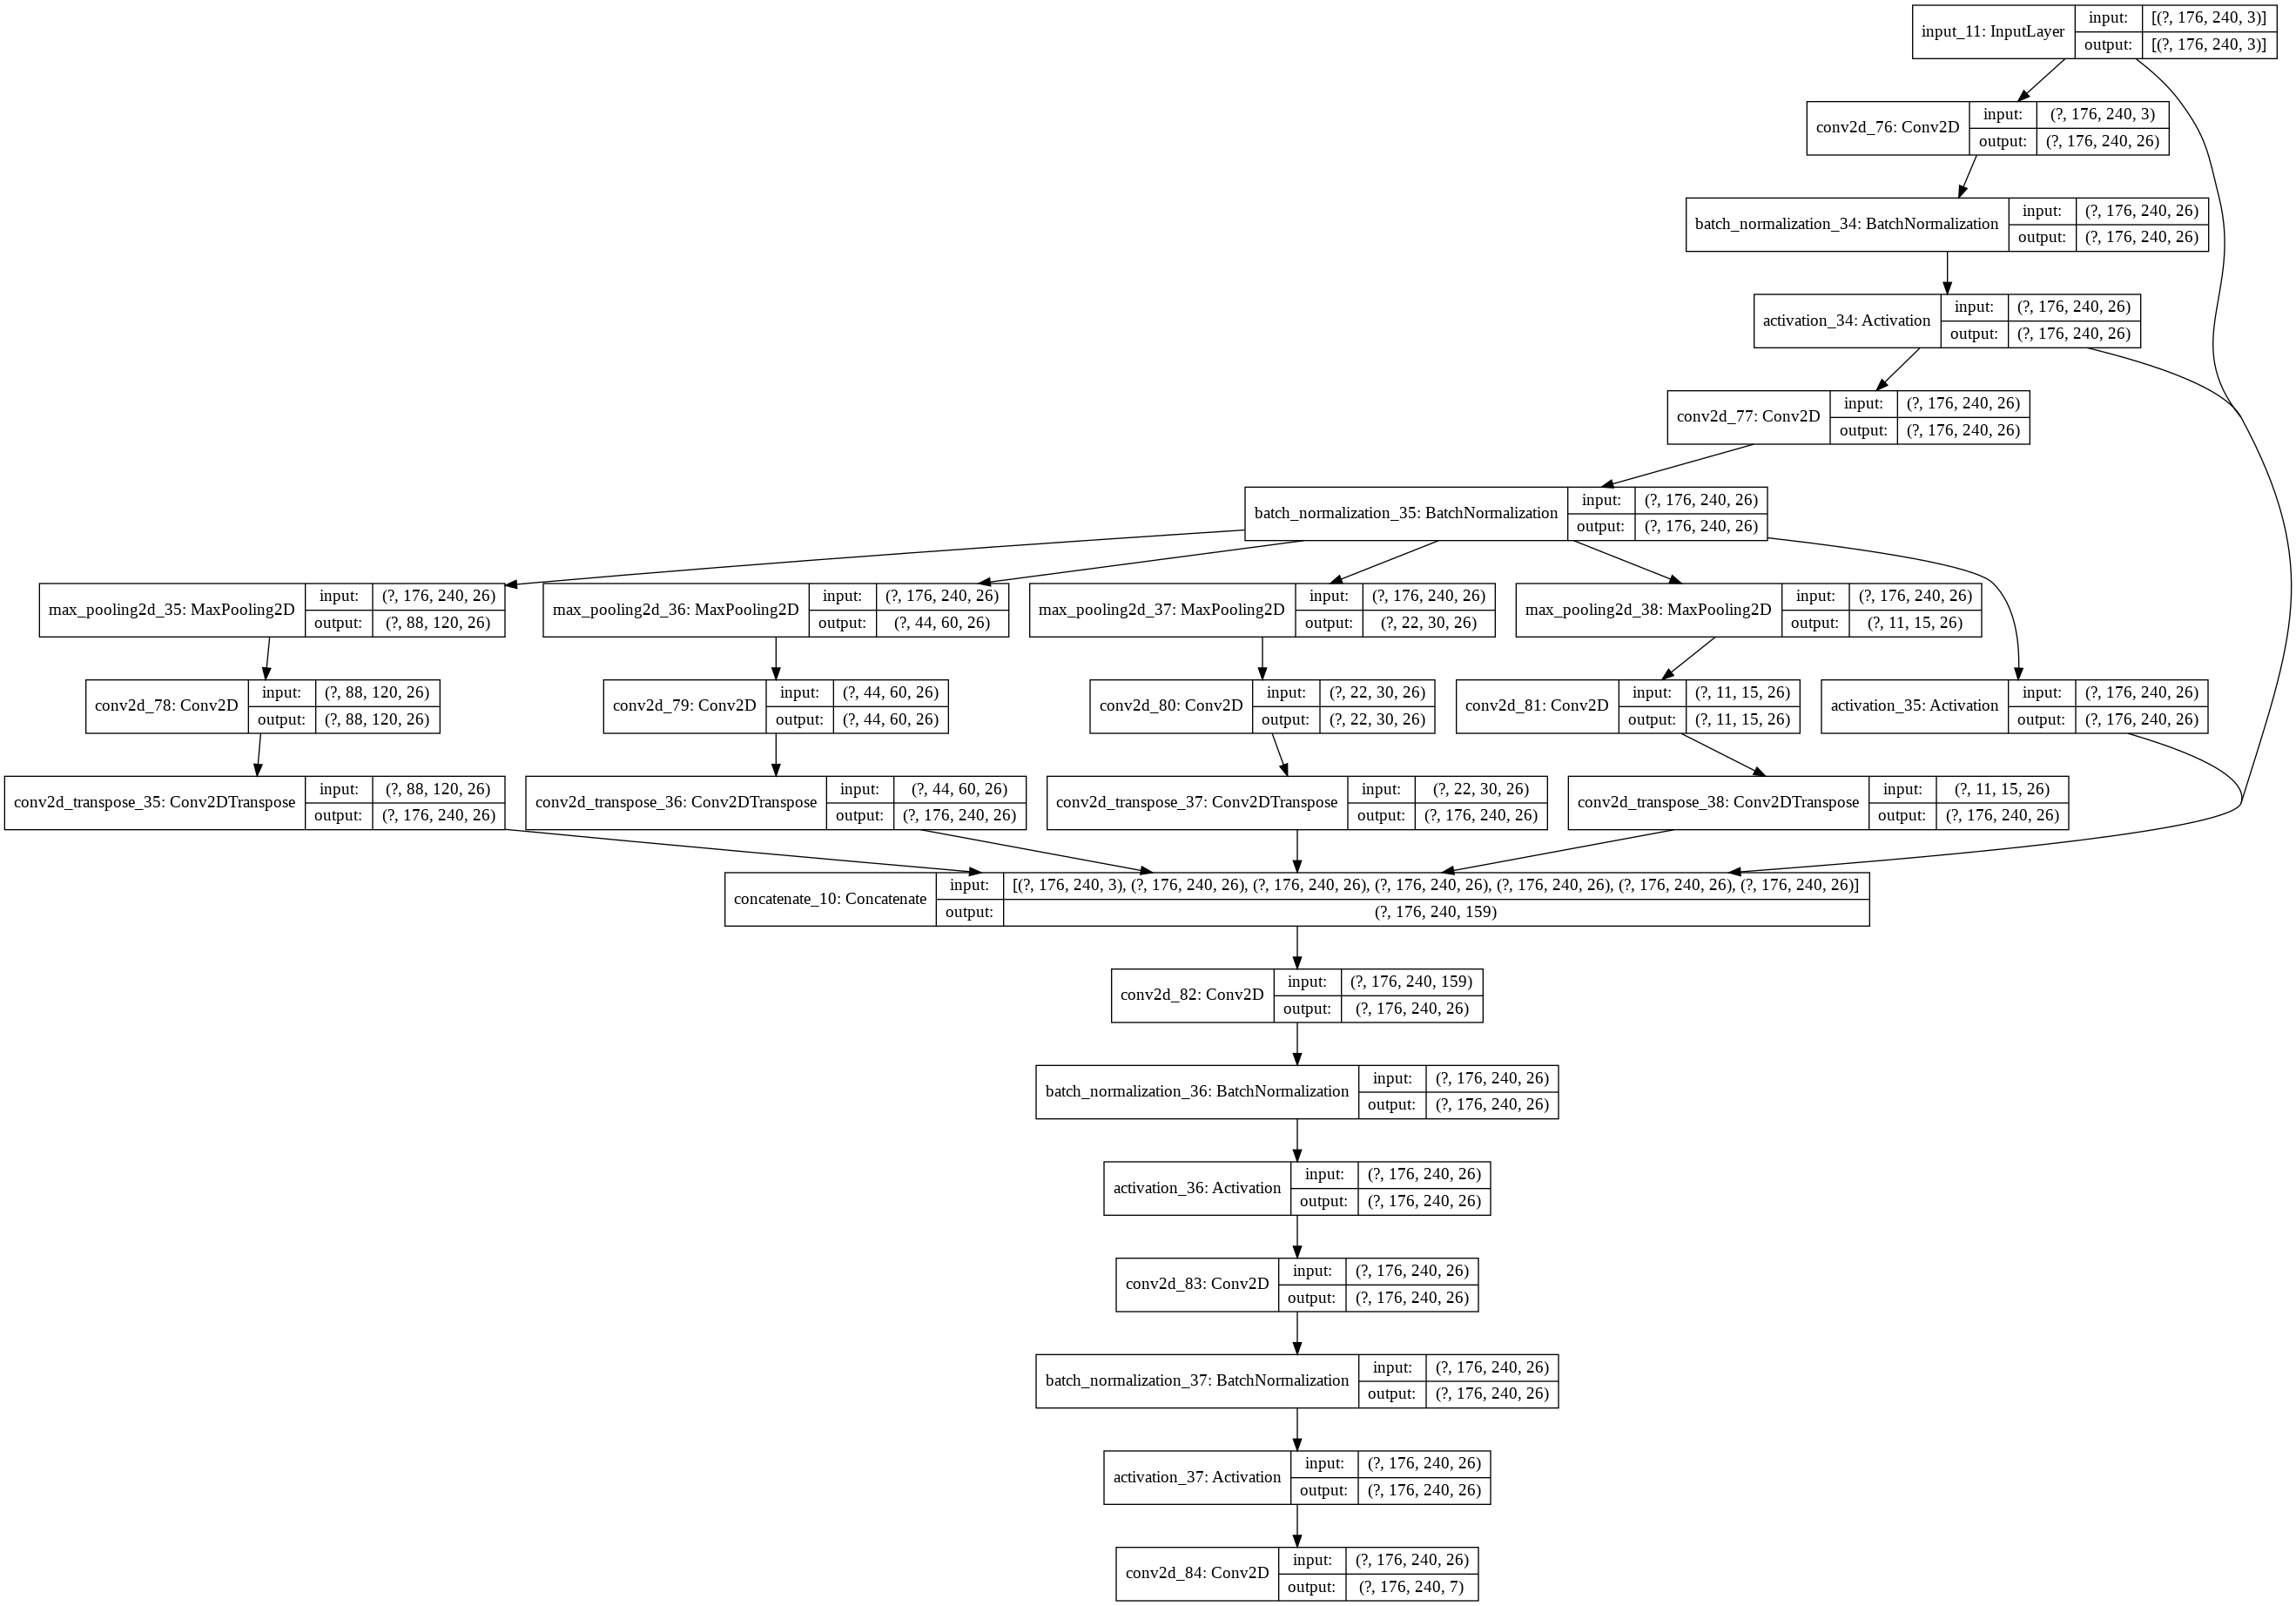

In [66]:
модель.структура_сети(модель_PSP)

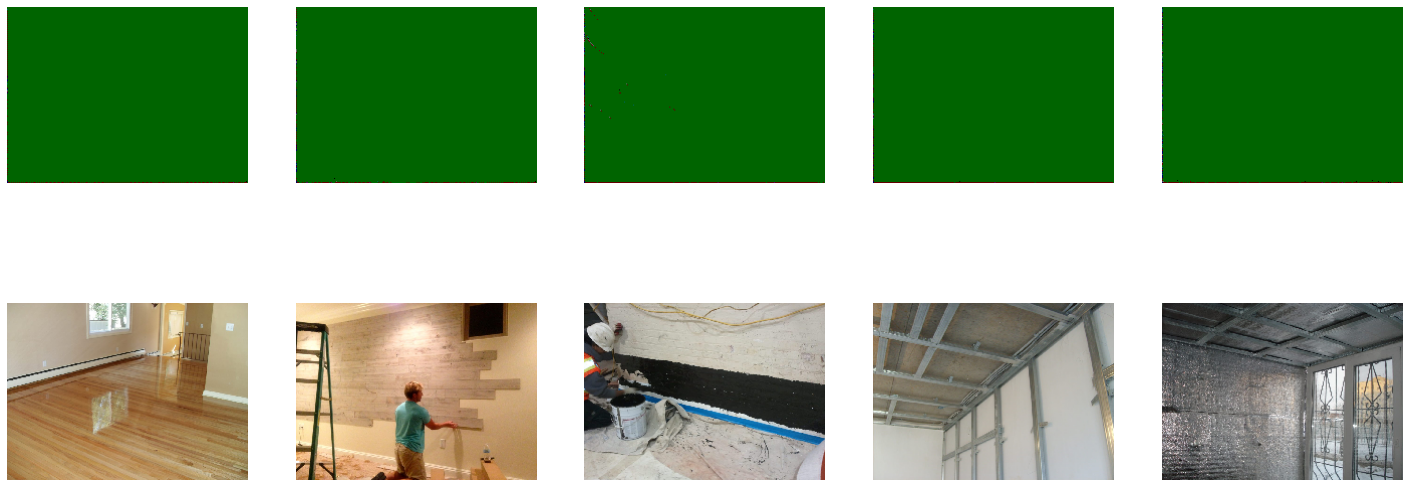

In [61]:
модель.тест_модели_сегментации(
    модель = модель_PSP,
    тестовые_изображения = x_test,
    количество_классов = 7
)

Epoch 1/110
20/20 [==============================] - 11s 532ms/step - loss: 0.8225 - точность: 0.5808 - val_loss: 1.1319 - val_точность: 0.5033
Epoch 2/110
20/20 [==============================] - 11s 546ms/step - loss: 0.8196 - точность: 0.5798 - val_loss: 1.1267 - val_точность: 0.4902
Epoch 3/110
20/20 [==============================] - 11s 551ms/step - loss: 0.8149 - точность: 0.5876 - val_loss: 1.1677 - val_точность: 0.5021
Epoch 4/110
20/20 [==============================] - 11s 530ms/step - loss: 0.8081 - точность: 0.5891 - val_loss: 1.1315 - val_точность: 0.5193
Epoch 5/110
20/20 [==============================] - 11s 527ms/step - loss: 0.8094 - точность: 0.5880 - val_loss: 1.2132 - val_точность: 0.5081
Epoch 6/110
20/20 [==============================] - 10s 520ms/step - loss: 0.8042 - точность: 0.5913 - val_loss: 1.1332 - val_точность: 0.5061
Epoch 7/110
20/20 [==============================] - 10s 521ms/step - loss: 0.7986 - точность: 0.5936 - val_loss: 1.1113 - val_точность:

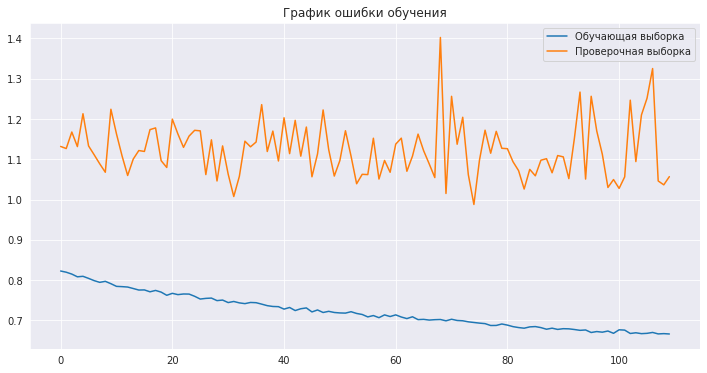

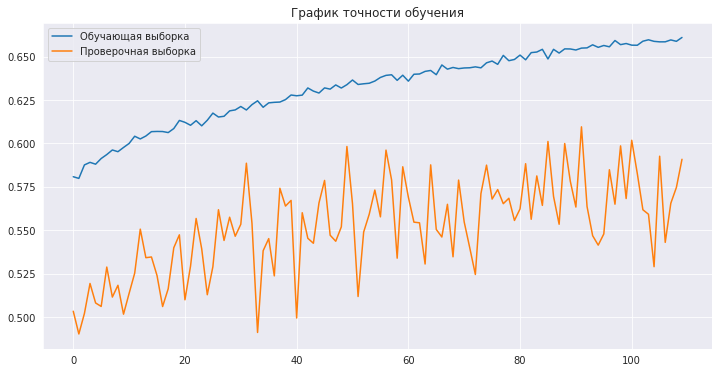

In [69]:
# Обучаем модель
модель.обучение_модели(
    модель_PSP,
    x_train, y_train,
    x_test, y_test,
    batch_size = 45,
    epochs = 110)

Лушая точность Epoch 92/110
20/20 [==============================] - 11s 533ms/step - loss: 0.6789 - точность: 0.6549 - val_loss: 1.0520 - val_точность: 0.6095

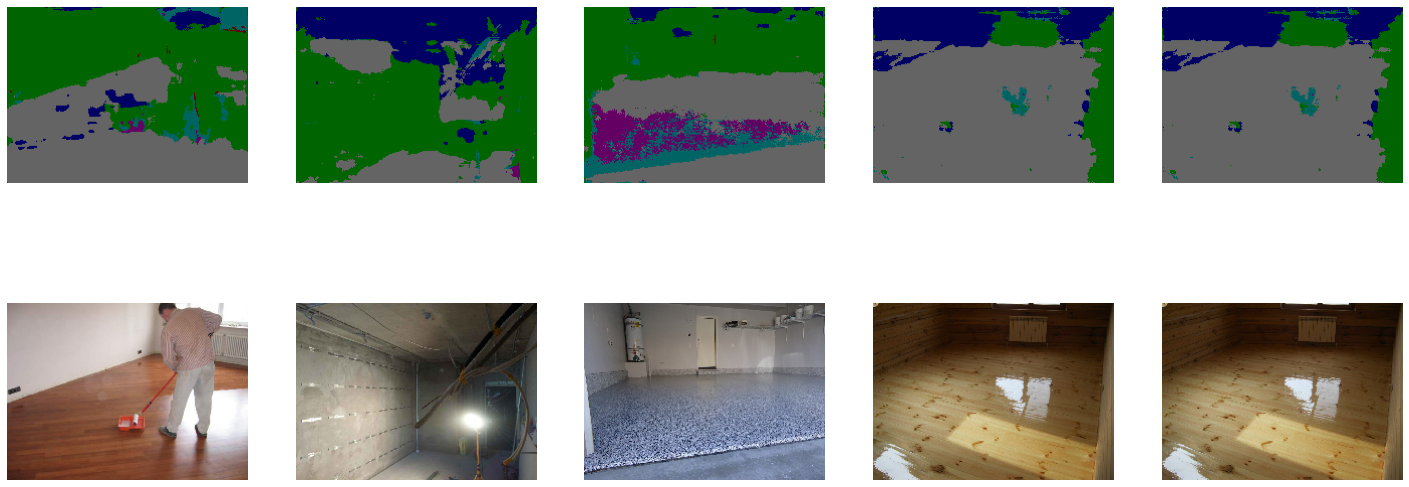

In [70]:
модель.тест_модели_сегментации(
    модель = модель_PSP,
    тестовые_изображения = x_test,
    количество_классов = 7
)